# Logistic Regression
## -- Chronic Kidney Disease

### Independent Variable： Hemoglobin(numerical) - hemo in gms
### Dependent Variable：Chronic Kidney Disease

In [307]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import matplotlib.pyplot as plt
%matplotlib inline

import ipaddress
import netaddr

import sys
sys.path.append(r'C:\Users\Tina_\Desktop\Machine learning\ml-networking-master\lib') 
from parse_pcap import pcap_to_pandas, send_rates

In [308]:
csv = pd.read_csv(r'C:\Users\Tina_\Desktop\Machine learning\Data\Chronic Kidney Disease.csv')

# Pandas Dataframe with only pcc(Pus Cell clumps) "notpresent" 
ckd_csv = csv.loc[pcap['pcc'] == 'notpresent'];
ckd_csv.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,response
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,7900,3.9,yes,yes,no,good,no,no,ckd,0
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,no,yes,no,good,no,no,ckd,0
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,yes,no,no,poor,no,no,ckd,0
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,7200,5.5,no,no,no,good,no,no,notckd,1
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,8300,4.6,yes,no,no,poor,no,no,ckd,0
5,175,60.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,4200,3.4,yes,no,no,good,no,no,ckd,0
6,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,9900,4.7,no,no,no,good,no,no,notckd,1
7,332,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,10500,6.1,no,no,no,good,no,no,notckd,1
8,167,34.0,70.0,1.020,0.0,0.0,abnormal,normal,notpresent,notpresent,...,2200,NaN,no,no,no,poor,no,no,ckd,0
9,245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,7200,2.6,yes,no,yes,poor,no,no,ckd,0


In [309]:
ckd_csv = ckd_csv.loc[:,['hemo','classification','response']]
ckd_csv.head(10)

,hemo,classification,response
0,12.6,ckd,0
1,11.7,ckd,0
2,12.1,ckd,0
3,17.8,notckd,1
4,11.1,ckd,0
5,NaN,ckd,0
6,17.5,notckd,1
7,15.3,notckd,1
8,12.7,ckd,0
9,6.3,ckd,0


In [310]:
ckd_csv.shape

(250, 3)

In [311]:
ckd_csv1 = ckd_csv.dropna(axis=0,subset = ['hemo'])
ckd_csv1.head(10)

,hemo,classification,response
0,12.6,ckd,0
1,11.7,ckd,0
2,12.1,ckd,0
3,17.8,notckd,1
4,11.1,ckd,0
6,17.5,notckd,1
7,15.3,notckd,1
8,12.7,ckd,0
9,6.3,ckd,0
10,13.7,notckd,1


In [312]:
ckd_csv1.shape

(214, 3)

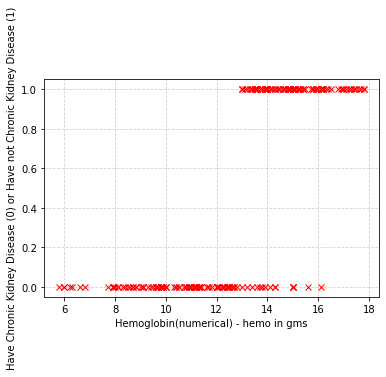

In [313]:
x = ckd_csv1['hemo'].values
y = ckd_csv1['response'].values

plt.plot(x,y, 'x', color='red', linewidth=0.2)
plt.ylabel("Have Chronic Kidney Disease (0) or Have not Chronic Kidney Disease (1)")
plt.xlabel("Hemoglobin(numerical) - hemo in gms")
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [314]:
regr = LogisticRegression(solver='lbfgs', C=1)
regr.fit(x.reshape(-1,1),y)

LogisticRegression(C=1)

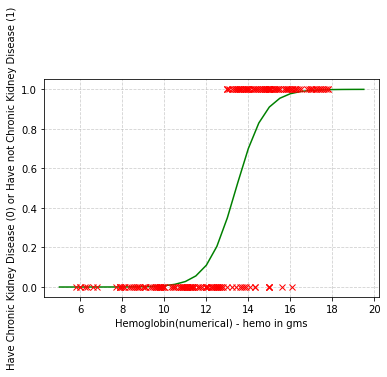

In [315]:
z = np.arange(5, 20, 0.5).reshape(-1, 1);

plt.plot(z, regr.predict_proba(z)[:, 1], color='green');
plt.plot(x,y, 'x', color='red', linewidth=0.5)
plt.ylabel("Have Chronic Kidney Disease (0) or Have not Chronic Kidney Disease (1)")
plt.xlabel("Hemoglobin(numerical) - hemo in gms")
plt.grid(linestyle='--', alpha=0.6)
plt.show()